## 1. Pre-processing

This script ingests an 'irrigated_area' shapefile (AKA "nmdb_Summer2013_14_Irrigated_OEHandLS_masked.shp") from a given year and adds a uniqueID column to allow the 'irrigatedWIT.ipynb' script to run.

It outputs a processed shapefile that's ready to be used by 'irrigatedWIT.ipynb'.

### User Inputs

In [9]:
catchmentName = 'GWYDIR'
year = "2018"
nmdb_shp = "data/SICA_nmdb/nmdb_Summer2018_19_Irrigated_OEHandLS_masked.shp"
catchment = 'data/nmdb_individual_catchments/GWYDIR RIVER.shp'

Run the follwoing cells to process the shapefile

In [10]:
import geopandas as gpd

In [11]:
#import files and clip to catchment
nmdb_irr = gpd.read_file(nmdb_shp)
catch = gpd.read_file(catchment)
subcath_irr = gpd.overlay(nmdb_irr, catch, how='intersection')

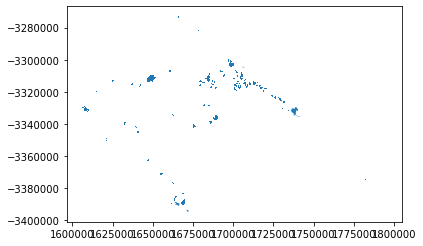

In [12]:
#plot to make sure the clip-to-catchment looks right
subcath_irr.plot(figsize=(6,6))

In [13]:
#add a unique ID
subcath_irr['UniqueID'] = [catchmentName+"_"+year+"_"+str(i) for i in subcath_irr.index]

In [14]:
#check the id looks right
subcath_irr.tail()

,DN,area,AREA,PERIMETER,AUS_,AUS_ID,F_CODE,BNAME,BNUM,RNAME,RNUM,DNAME,DNUM,CENTROID_Y,CENTROID_X,geometry,UniqueID
79,80,1076250.0,2.481013,10.41124,1310,1019,dbasin_cent,GWYDIR RIVER,18,NAMOI-GWYDIR,I,MURRAY-DARLING,IV,-29.809893,150.104732,"POLYGON ((1669475 -3386825, 1669525 -3386825, ...",GWYDIR_2018_79
80,80,510625.0,2.481013,10.41124,1310,1019,dbasin_cent,GWYDIR RIVER,18,NAMOI-GWYDIR,I,MURRAY-DARLING,IV,-29.809893,150.104732,"POLYGON ((1660800 -3388950, 1660825 -3388950, ...",GWYDIR_2018_80
81,80,5392500.0,2.481013,10.41124,1310,1019,dbasin_cent,GWYDIR RIVER,18,NAMOI-GWYDIR,I,MURRAY-DARLING,IV,-29.809893,150.104732,"POLYGON ((1668150 -3387550, 1668275 -3387550, ...",GWYDIR_2018_81
82,80,3897500.0,2.481013,10.41124,1310,1019,dbasin_cent,GWYDIR RIVER,18,NAMOI-GWYDIR,I,MURRAY-DARLING,IV,-29.809893,150.104732,"POLYGON ((1663650 -3388400, 1663725 -3388400, ...",GWYDIR_2018_82
83,80,2318750.0,2.481013,10.41124,1310,1019,dbasin_cent,GWYDIR RIVER,18,NAMOI-GWYDIR,I,MURRAY-DARLING,IV,-29.809893,150.104732,"POLYGON ((1671200 -3393425, 1671275 -3393425, ...",GWYDIR_2018_83


In [15]:
#export to file for use in WIT analysis
subcath_irr.to_file('data/shapes_WIT_ready/'+catchmentName+"_"+year+"_WIT.shp")